In [15]:
import utils
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [17]:
frames = np.load("/calibration/ros2/src/camera_intrinsic/camera_intrinsic/intrinsic_2024-07-07_14-56-53.npz")

In [18]:
for frame in frames:
    cv2.imshow("frame", frame)
    
    if cv2.waitKey(1) & 0xFF == 27:  # 27 is the ASCII code for 'ESC'
        break
    
cv2.destroyAllWindows()

In [19]:
sharp_frames = utils.get_sharp_frames(frames, threshold = 300)

Selecting sharp frames out of 1857 frames
Found 386 sharp frames out of 1857 with threshold 300


In [20]:
representative_frames = utils.get_n_representative_frames(sharp_frames, num_frames=30)

Selecting 30 representative frames out of 386 frames
Reduced frames from 110592 to 37 dimensions keeping 95.0 of variance
Selected 30 representative frames out of 193 frames


In [6]:
for representative_frame in representative_frames:
    cv2.imshow("frame", representative_frame)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
objpoints = []
imgpoints = []
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

for frame in representative_frames:
    ret, img_pts = utils.find_chessboard_corners(frame, (9, 6))
    if ret:    
        objpoints.append(objp)
        imgpoints.append(img_pts)

print(len(imgpoints))

Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
Found chessboard corners in image
29


In [22]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (640, 480), None, None)

In [23]:
mtx

array([[574.01870681,   0.        , 328.90797846],
       [  0.        , 573.7619472 , 243.81421652],
       [  0.        ,   0.        ,   1.        ]])

In [24]:
dist

array([[ 3.10334662e-02,  6.15702392e-01,  8.31168943e-04,
        -3.26508230e-04, -2.21216690e+00]])

In [11]:
mean_error = 0
errors     = []
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    errors.append(error)


print( "total error: {}".format( np.sum(errors)/len(objpoints)) )

total error: 0.01937013794166028


In [41]:
objpoints = np.array(objpoints)
imgpoints = np.array(imgpoints)

In [44]:
objpoints2d = objpoints[:, :, :2].shape
imgpoints2d = imgpoints.squeeze()



(29, 54, 2)

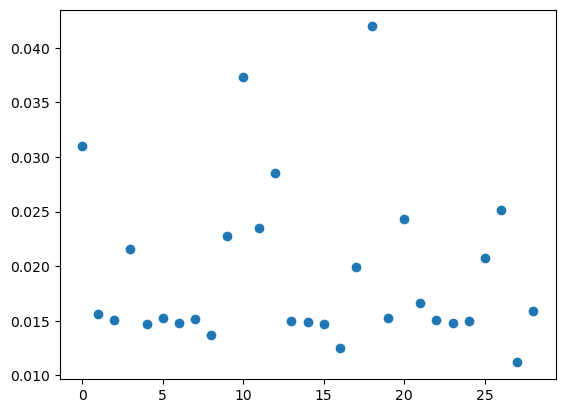

In [12]:
plt.scatter([i for i in range(0, len(objpoints))], errors)